<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_4/clusterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.cluster import BisectingKMeans, KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

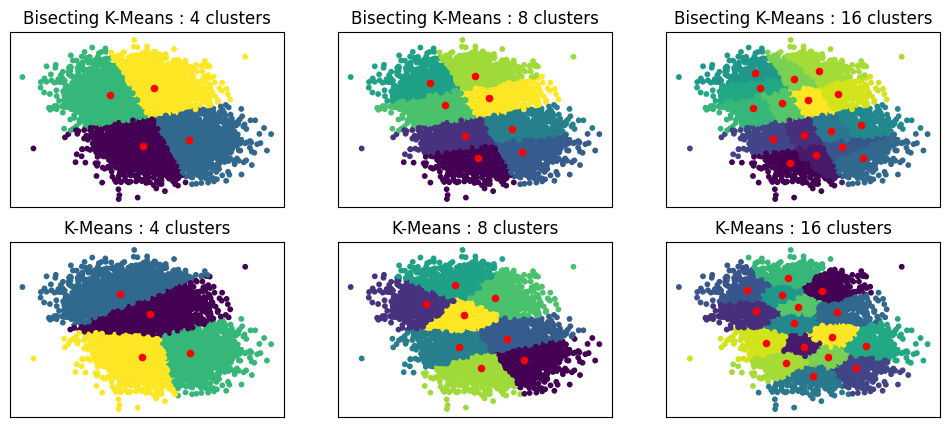

In [2]:
# Generate sample data
n_samples = 10_000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 8, 16]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# make subplot for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init = 3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:,0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c='r', s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Завдання 2.   Різні алгоритми кластеризаціі.

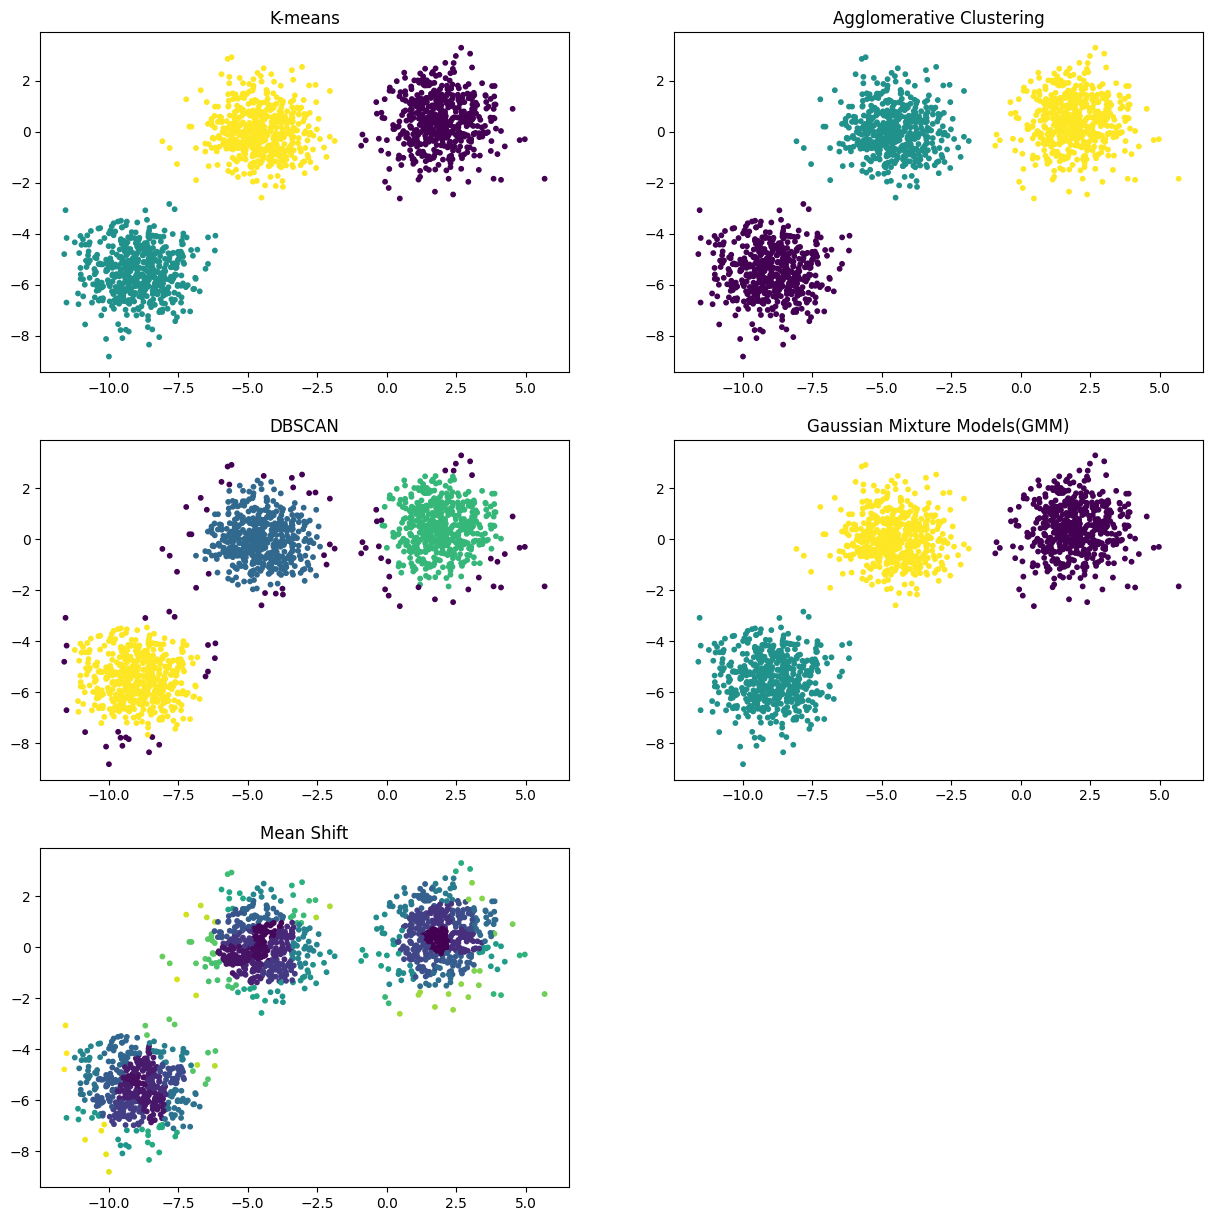

In [8]:
# Generate sample data
n_samples = 1_500
random_state = 170

X, _ = make_blobs(n_samples=n_samples, random_state=random_state)

# визначення кількості кластерів
n_clusters = 3

# Метод K-Means
kmeans = KMeans(n_clusters=n_clusters)
y_kmeans = kmeans.fit_predict(X)

# Іерархічна кластеризація (Agglomerative Clustering)
agglo = AgglomerativeClustering(n_clusters=n_clusters)
y_agglo = agglo.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
y_dbscan = dbscan.fit_predict(X)

# Mean Shift
mean_shift = MeanShift(bandwidth=0.5)
y_mean_shift = mean_shift.fit_predict(X)

# Gaussian Mixture Models(GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=random_state)
y_gmm = gmm.fit_predict(X)

# візуалізація результатів
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# K-means
axs[0, 0].scatter(X[:,0], X[:, 1], c=y_kmeans, s=10, cmap="viridis")
axs[0, 0].set_title("K-means")

# Agglomerative Clustering
axs[0, 1].scatter(X[:,0], X[:, 1], c=y_agglo, s=10, cmap="viridis")
axs[0, 1].set_title("Agglomerative Clustering")

# DBSCAN
axs[1, 0].scatter(X[:,0], X[:, 1], c=y_dbscan, s=10, cmap="viridis")
axs[1, 0].set_title("DBSCAN")

#Gaussian Mixture Models(GMM)
axs[1, 1].scatter(X[:,0], X[:, 1], c=y_gmm, s=10, cmap="viridis")
axs[1, 1].set_title("Gaussian Mixture Models(GMM)")

# Mean Shift
axs[2, 0].scatter(X[:,0], X[:, 1], c=y_mean_shift, s=10, cmap="viridis")
axs[2, 0].set_title("Mean Shift")

# Залишаємо останню ячейку порожньою
axs[2, 1].axis("off")
plt.show()

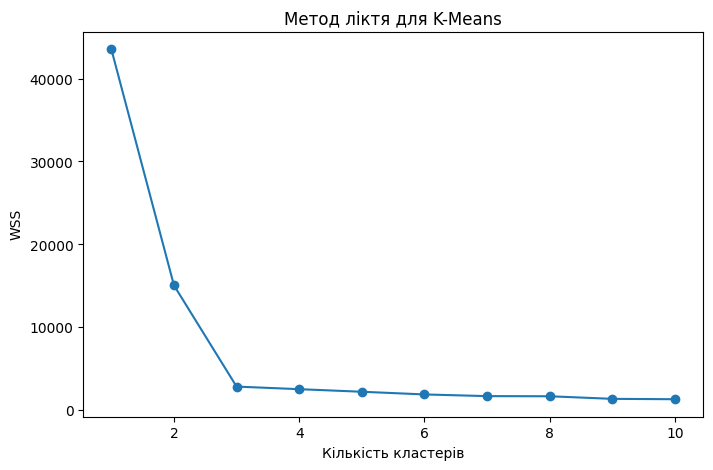

In [9]:
# Генерація даних
n_samples = 1_500
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# визначення кількості кластерів для тестування
k_range = range(1, 11)
wcss = []

# K-Means
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=random_state)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Побудова графіку метода ліктя
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('WSS')
plt.title('Метод ліктя для K-Means')
plt.show()